### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np
import seaborn as sns
import scipy.stats as stats




In [3]:
# Load the dataset
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [4]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [5]:
# Create a crosstab of product category and best-seller status
crosstab_bestseller = pd.crosstab(df['category'], df['isBestSeller'], normalize='index')

# Sort categories by proportion of best-sellers
bestseller_proportion = crosstab_bestseller[1].sort_values(ascending=False)

# Display top 5 categories by best-seller proportion
bestseller_proportion.head(5)

category
Grocery                           0.058135
Smart Home Security & Lighting    0.057692
Health & Personal Care            0.057686
Mobile Phone Accessories          0.042471
Power & Hand Tools                0.035339
Name: True, dtype: float64

2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

In [6]:
# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['category'], df['isBestSeller']))

# Calculate Cramér's V
n = df.shape[0]
cramers_v = np.sqrt(chi2 / (n * (min(pd.crosstab(df['category'], df['isBestSeller']).shape) - 1)))

chi2, p, cramers_v

(36540.20270061387, 0.0, 0.1222829439760564)

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

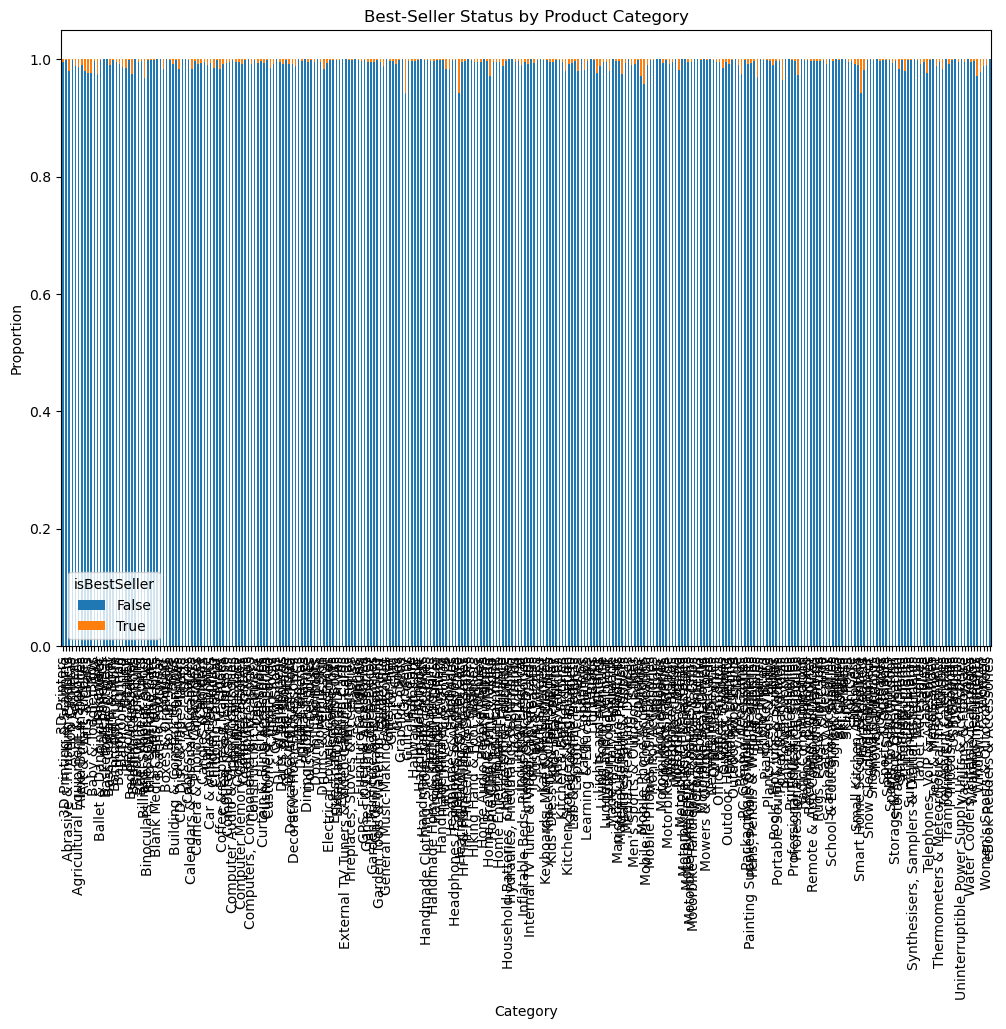

In [7]:
# Stacked bar chart for best-seller distribution by category
crosstab_bestseller.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Best-Seller Status by Product Category')
plt.xlabel('Category')
plt.ylabel('Proportion')
plt.show()

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*


In [8]:
# Calculate IQR for price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.



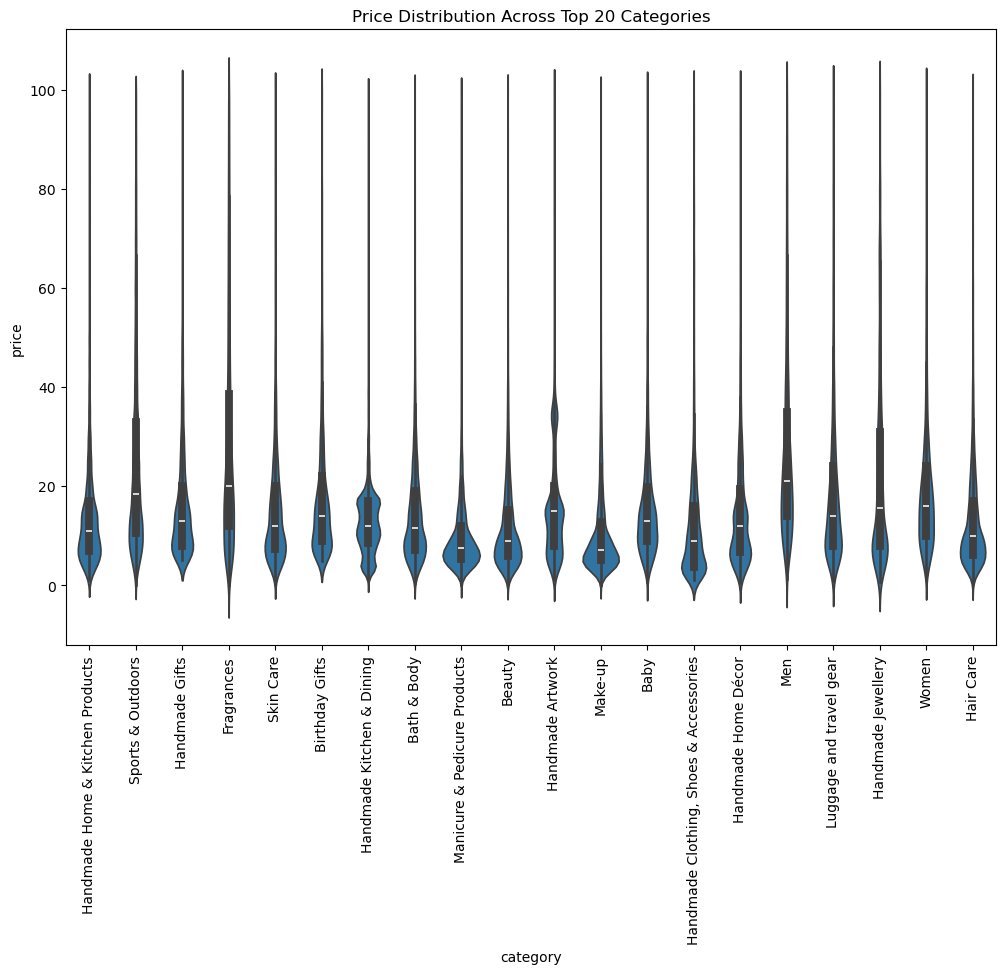

In [9]:
# Filter top 20 categories based on count
top_20_categories = df_no_outliers['category'].value_counts().head(20).index

# Violin plot for price distribution across top 20 categories
plt.figure(figsize=(12,8))
sns.violinplot(x='category', y='price', data=df_no_outliers[df_no_outliers['category'].isin(top_20_categories)])
plt.xticks(rotation=90)
plt.title('Price Distribution Across Top 20 Categories')
plt.show()

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.


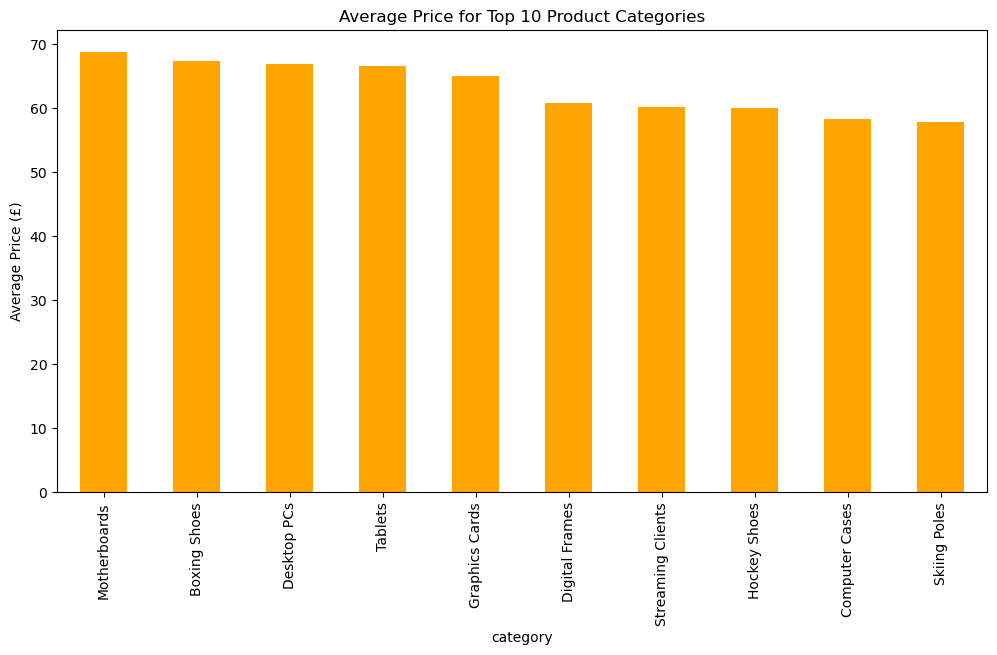

In [10]:
# Calculate the average price for top 10 categories
avg_price_top10 = df_no_outliers.groupby('category')['price'].mean().sort_values(ascending=False).head(10)

# Bar chart for average price of top 10 categories
plt.figure(figsize=(12,6))
avg_price_top10.plot(kind='bar', color='orange')
plt.title('Average Price for Top 10 Product Categories')
plt.ylabel('Average Price (£)')
plt.show()

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [11]:
# Filter top 10 categories based on count
top_10_categories = df_no_outliers['category'].value_counts().head(10).index


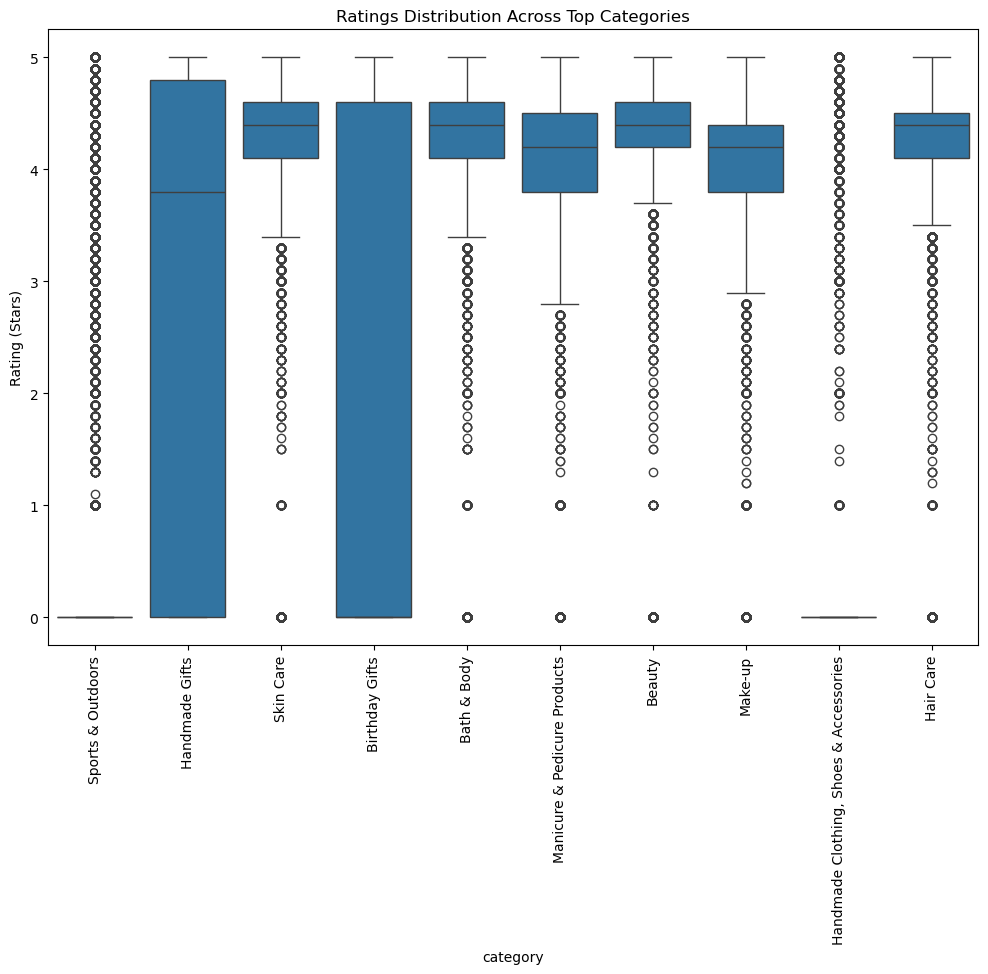

In [12]:
# Box plot for product ratings across top 10 categories
plt.figure(figsize=(12,8))
sns.boxplot(x='category', y='stars', data=df[df['category'].isin(top_10_categories)])
plt.xticks(rotation=90)
plt.title('Ratings Distribution Across Top Categories')
plt.ylabel('Rating (Stars)')
plt.show()

In [13]:
# Group by category and calculate the median rating for each
median_rating_by_category = df.groupby('category')['stars'].median().sort_values(ascending=False)

# Display the category with the highest median rating
highest_median_rating_category = median_rating_by_category.head(1)
highest_median_rating_category

category
Computer Memory    4.7
Name: stars, dtype: float64

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	



In [14]:
# Calculate correlation between price and stars
correlation = df_no_outliers['price'].corr(df_no_outliers['stars'])
correlation

-0.0776729987818137

2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 


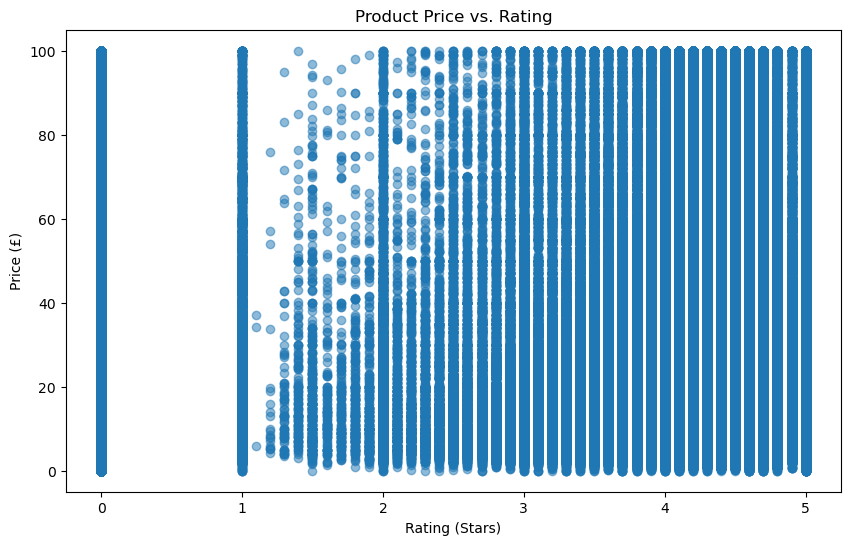

In [15]:
# Scatter plot of product price vs. rating
plt.figure(figsize=(10,6))
plt.scatter(df_no_outliers['stars'], df_no_outliers['price'], alpha=0.5)
plt.title('Product Price vs. Rating')
plt.xlabel('Rating (Stars)')
plt.ylabel('Price (£)')
plt.show()

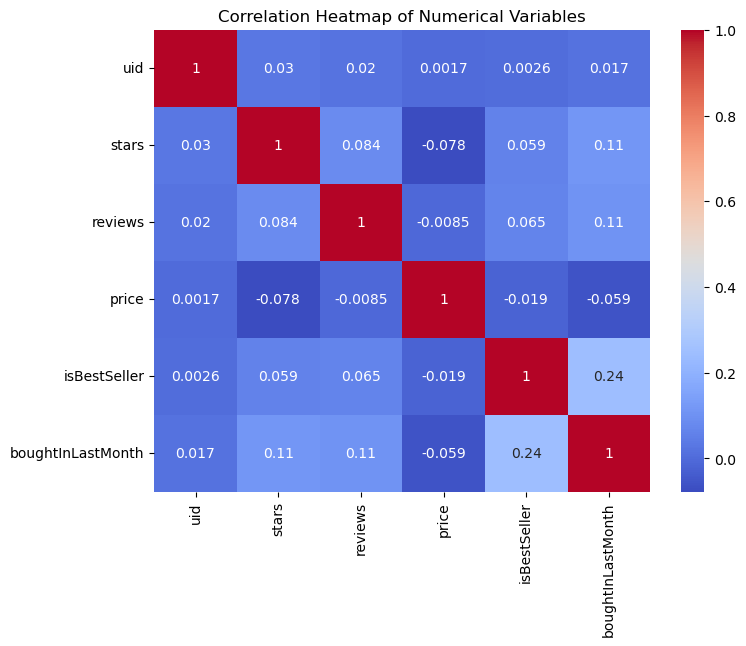

In [16]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_no_outliers.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

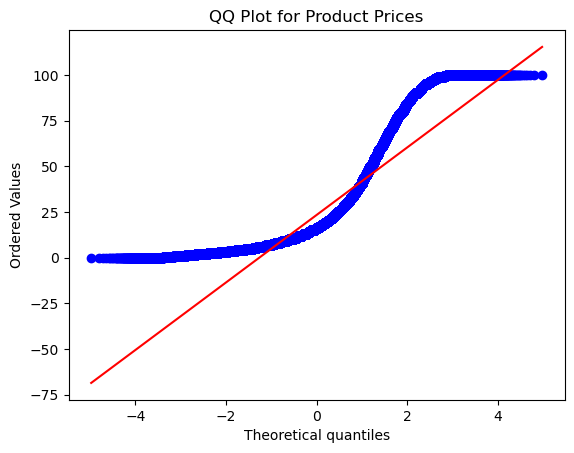

In [18]:
# QQ plot for product price
stats.probplot(df_no_outliers['price'], dist="norm", plot=plt)
plt.title('QQ Plot for Product Prices')
plt.show()

**Bonus**: 

- Do the same analysis without taking out the outliers. What are your insights?